In [1]:
import pandas_datareader.data as reader
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start = (datetime.datetime(2018, 1, 1))
end = (datetime.datetime(2020, 1, 1))

In [3]:
symbol = ['ADBE']

In [4]:
start = (datetime.datetime(2018, 1, 1))
end = (datetime.datetime(2020, 1, 1))

data = yf.download(symbol, start=start, end=end)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

[*********************100%***********************]  1 of 1 completed
                  open        high         low       close   Adj Close  \
Date                                                                     
2018-01-02  175.850006  177.800003  175.259995  177.699997  177.699997   
2018-01-03  178.000000  181.889999  177.699997  181.039993  181.039993   
2018-01-04  181.929993  184.059998  181.639999  183.220001  183.220001   
2018-01-05  185.000000  185.899994  183.539993  185.339996  185.339996   
2018-01-08  184.949997  185.600006  183.830002  185.039993  185.039993   

             volume  
Date                 
2018-01-02  2432800  
2018-01-03  2561200  
2018-01-04  2211400  
2018-01-05  2376500  
2018-01-08  2088000  


In [5]:
data = data[["Adj Close"]]

In [6]:
data

,Adj Close
Date,
2018-01-02,177.699997
2018-01-03,181.039993
2018-01-04,183.220001
2018-01-05,185.339996
2018-01-08,185.039993
...,...
2019-12-24,329.640015
2019-12-26,331.200012
2019-12-27,330.790009


In [7]:
Y = np.diff(np.log(data['Adj Close']))

In [8]:
type(Y)

numpy.ndarray

In [9]:
df = pd.DataFrame(Y, columns = ['Adj Close'])

In [10]:
df

,Adj Close
0,0.018621
1,0.011970
2,0.011504
3,-0.001620
4,0.008931
...,...
497,0.002095
498,0.004721
499,-0.001239
500,-0.007434


In [11]:
factors = pd.read_csv("fama-french.csv", skiprows=3 )

In [12]:
factors

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.00,-0.34,-0.01,0.15,0.012
1,19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
2,19630703,0.63,-0.17,-0.10,0.17,-0.33,0.012
3,19630705,0.40,0.08,-0.27,0.08,-0.33,0.012
4,19630708,-0.63,0.04,-0.19,-0.29,0.13,0.012
...,...,...,...,...,...,...,...
14509,20210222,-1.12,0.68,3.14,1.66,0.90,0.000
14510,20210223,-0.15,-1.05,0.90,1.08,-0.19,0.000
14511,20210224,1.15,1.48,1.34,-0.29,0.32,0.000
14512,20210225,-2.73,-0.90,0.87,1.00,0.47,0.000


In [13]:
factors.rename({"Unnamed: 0" : "Date"}, inplace=True,axis='columns')

In [14]:
factors.index = factors.Date

In [15]:
factors

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
19630701,19630701,-0.67,0.00,-0.34,-0.01,0.15,0.012
19630702,19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
19630703,19630703,0.63,-0.17,-0.10,0.17,-0.33,0.012
19630705,19630705,0.40,0.08,-0.27,0.08,-0.33,0.012
19630708,19630708,-0.63,0.04,-0.19,-0.29,0.13,0.012
...,...,...,...,...,...,...,...
20210222,20210222,-1.12,0.68,3.14,1.66,0.90,0.000
20210223,20210223,-0.15,-1.05,0.90,1.08,-0.19,0.000
20210224,20210224,1.15,1.48,1.34,-0.29,0.32,0.000


In [16]:
factors.dtypes

Date        int64
Mkt-RF    float64
SMB       float64
HML       float64
RMW       float64
CMA       float64
RF        float64
dtype: object

In [17]:
factors['Date'] = pd.to_datetime(factors['Date'], format='%Y%m%d')

In [18]:
factors

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
19630701,1963-07-01,-0.67,0.00,-0.34,-0.01,0.15,0.012
19630702,1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.012
19630703,1963-07-03,0.63,-0.17,-0.10,0.17,-0.33,0.012
19630705,1963-07-05,0.40,0.08,-0.27,0.08,-0.33,0.012
19630708,1963-07-08,-0.63,0.04,-0.19,-0.29,0.13,0.012
...,...,...,...,...,...,...,...
20210222,2021-02-22,-1.12,0.68,3.14,1.66,0.90,0.000
20210223,2021-02-23,-0.15,-1.05,0.90,1.08,-0.19,0.000
20210224,2021-02-24,1.15,1.48,1.34,-0.29,0.32,0.000


In [19]:
start

datetime.datetime(2018, 1, 1, 0, 0)

In [20]:
fama = factors[(factors["Date"] > start) & (factors["Date"] <= '2020-01-01')]

In [21]:
fama = fama.iloc[1:,:]

In [22]:
fama

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
20180103,2018-01-03,0.59,-0.48,-0.20,-0.74,-0.07,0.005
20180104,2018-01-04,0.42,-0.23,0.25,-0.02,0.30,0.005
20180105,2018-01-05,0.66,-0.36,-0.26,0.39,-0.37,0.005
20180108,2018-01-08,0.19,-0.21,0.05,-0.09,0.03,0.005
20180109,2018-01-09,0.15,-0.36,-0.05,-0.11,-0.06,0.005
...,...,...,...,...,...,...,...
20191224,2019-12-24,0.01,0.36,-0.02,-0.28,0.03,0.007
20191226,2019-12-26,0.48,-0.56,-0.02,0.22,-0.20,0.007
20191227,2019-12-27,-0.10,-0.54,-0.07,0.25,0.15,0.007


In [23]:
fama.reset_index(drop=True, inplace=True)

In [24]:
adbe = fama.join(df, how='outer')

In [25]:
adbe

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Adj Close
0,2018-01-03,0.59,-0.48,-0.20,-0.74,-0.07,0.005,0.018621
1,2018-01-04,0.42,-0.23,0.25,-0.02,0.30,0.005,0.011970
2,2018-01-05,0.66,-0.36,-0.26,0.39,-0.37,0.005,0.011504
3,2018-01-08,0.19,-0.21,0.05,-0.09,0.03,0.005,-0.001620
4,2018-01-09,0.15,-0.36,-0.05,-0.11,-0.06,0.005,0.008931
...,...,...,...,...,...,...,...,...
497,2019-12-24,0.01,0.36,-0.02,-0.28,0.03,0.007,0.002095
498,2019-12-26,0.48,-0.56,-0.02,0.22,-0.20,0.007,0.004721
499,2019-12-27,-0.10,-0.54,-0.07,0.25,0.15,0.007,-0.001239
500,2019-12-30,-0.57,0.27,0.59,0.13,0.45,0.007,-0.007434


In [26]:
corr = adbe.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Mkt-RF,SMB,HML,RMW,CMA,RF,Adj Close
Mkt-RF,1.00,0.07,-0.24,-0.13,-0.44,-0.00,0.75
SMB,0.07,1.00,0.06,-0.08,-0.04,-0.05,-0.01
HML,-0.24,0.06,1.00,0.13,0.60,0.04,-0.51
RMW,-0.13,-0.08,0.13,1.00,0.15,0.05,-0.20
CMA,-0.44,-0.04,0.60,0.15,1.00,0.03,-0.61
RF,-0.00,-0.05,0.04,0.05,0.03,1.00,-0.04
Adj Close,0.75,-0.01,-0.51,-0.20,-0.61,-0.04,1.00


## OLS

In [27]:
import numpy as np
import scipy.stats as ss
import pandas as pd

In [28]:
adbe

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Adj Close
0,2018-01-03,0.59,-0.48,-0.20,-0.74,-0.07,0.005,0.018621
1,2018-01-04,0.42,-0.23,0.25,-0.02,0.30,0.005,0.011970
2,2018-01-05,0.66,-0.36,-0.26,0.39,-0.37,0.005,0.011504
3,2018-01-08,0.19,-0.21,0.05,-0.09,0.03,0.005,-0.001620
4,2018-01-09,0.15,-0.36,-0.05,-0.11,-0.06,0.005,0.008931
...,...,...,...,...,...,...,...,...
497,2019-12-24,0.01,0.36,-0.02,-0.28,0.03,0.007,0.002095
498,2019-12-26,0.48,-0.56,-0.02,0.22,-0.20,0.007,0.004721
499,2019-12-27,-0.10,-0.54,-0.07,0.25,0.15,0.007,-0.001239
500,2019-12-30,-0.57,0.27,0.59,0.13,0.45,0.007,-0.007434


In [29]:
adbe.columns

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Adj Close'], dtype='object')

In [86]:
a_imp_features = adbe[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

In [31]:
Y = adbe["Adj Close"]

In [32]:
Y = Y
T = Y.shape[0];
# SPY = DataReader('SPY',  'yahoo', datetime(2020,1,1), datetime(2020,8,31))
# F = np.diff(np.log(SPY['Adj Close'].values))
F = a_imp_features.values
'Add Constant to X'
X = np.column_stack([np.ones((T,1)), F])
N = X.shape[1]

'REGRESSION STARTS:'       
'Linear Regression of Y: T x 1 on' 
'Regressors X: T x N'

invXX = np.linalg.inv(X.transpose()@X)
'OLS estimator beta: N x 1'
beta_hat = invXX@X.transpose()@Y
'Predictive value of Y_t using OLS'  
y_hat = X@beta_hat;       
'Residuals from OLS: Y - X*beta'        
residuals = Y - y_hat;            
'variance of Y_t or residuals'
sigma2 = (1/T)*(residuals.transpose()@residuals)
'standard deviation of Y_t or residuals'
sig = np.sqrt(sigma2) 
'variance-covariance matrix of beta_hat'
'N x N: on-diagnal variance(beta_j)'
'N x N: off-diagnal cov(beta_i, beta_j)'
varcov_beta_hat = (sigma2)*invXX
var_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'
R_square = 1 - residuals.transpose()@residuals/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N)

'Test Each Coefficient: beta_i'
't-test stat: N x 1'
t_stat = beta_hat.transpose()/var_beta_hat
' t-test significance level: N x 1'
p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'
F_stat = beta_hat.transpose()@varcov_beta_hat@beta_hat/\
         (residuals.transpose()@residuals)
'size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1'

p_val_F = 1-ss.chi2.cdf(F_stat,T-N)

REPORT = np.column_stack([beta_hat, t_stat,p_val_t])
print('Regression Statistics')
print('------------------------\n')
print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('beta             t_stat            p_val\n')
print(REPORT)
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

Regression Statistics
------------------------

 REGRESSION STATISTICS  

------------------------

beta             t_stat            p_val

[[ 4.07455309e-04  3.95752888e-02  4.84215864e-01]
 [ 1.18967184e-02  9.98278592e-01  1.59072143e-01]
 [-1.69860061e-03 -8.28684610e-02  5.33021934e-01]
 [-7.82942693e-03 -3.53257754e-01  6.38052393e-01]
 [-3.15059772e-03 -1.04012119e-01  5.41420134e-01]
 [-1.06938817e-02 -2.63096933e-01  6.03762066e-01]]

 Joint significance of all coefficients
 [4.258963865272715e-09, 1.0]
R-Square is       
 0.7084191013877439
Adjusted R Square 
 0.7054797778130235
Standard Error    
 0.010254720039623981
Observations      
 502
-------------------------



### Forward Selection

In [33]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [34]:
X = a_imp_features

In [35]:
forward_selection(X,Y)

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['Mkt-RF', 'HML', 'CMA', 'RMW']

### Backward Selection

In [36]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [37]:
backward_elimination(X,Y)

['Mkt-RF', 'HML', 'RMW', 'CMA']

### Mixed Selection

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [39]:
sffs = SFS(LinearRegression(),
         k_features=(2,4),
         forward=True,
         floating=True,
         cv=5)
sffs.fit(X, Y)
sffs.k_feature_names_

('Mkt-RF', 'HML', 'RMW', 'CMA')

In [113]:
a_imp_features = adbe[['Mkt-RF', 'HML', 'RMW', 'CMA']]

In [41]:
Y = Y
T = Y.shape[0];
# SPY = DataReader('SPY',  'yahoo', datetime(2020,1,1), datetime(2020,8,31))
# F = np.diff(np.log(SPY['Adj Close'].values))
F = a_imp_features.values
'Add Constant to X'
X = np.column_stack([np.ones((T,1)), F])
N = X.shape[1]

'REGRESSION STARTS:'       
'Linear Regression of Y: T x 1 on' 
'Regressors X: T x N'

invXX = np.linalg.inv(X.transpose()@X)
'OLS estimator beta: N x 1'
beta_hat = invXX@X.transpose()@Y
'Predictive value of Y_t using OLS'  
y_hat = X@beta_hat;       
'Residuals from OLS: Y - X*beta'        
residuals = Y - y_hat;            
'variance of Y_t or residuals'
sigma2 = (1/T)*(residuals.transpose()@residuals)
'standard deviation of Y_t or residuals'
sig = np.sqrt(sigma2) 
'variance-covariance matrix of beta_hat'
'N x N: on-diagnal variance(beta_j)'
'N x N: off-diagnal cov(beta_i, beta_j)'
varcov_beta_hat = (sigma2)*invXX
var_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'
R_square = 1 - residuals.transpose()@residuals/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N)

'Test Each Coefficient: beta_i'
't-test stat: N x 1'
t_stat = beta_hat.transpose()/var_beta_hat
' t-test significance level: N x 1'
p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'
F_stat = beta_hat.transpose()@varcov_beta_hat@beta_hat/\
         (residuals.transpose()@residuals)
'size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1'

p_val_F = 1-ss.chi2.cdf(F_stat,T-N)

REPORT = np.column_stack([beta_hat, t_stat,p_val_t])
print('Regression Statistics')
print('------------------------\n')
print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('beta             t_stat            p_val\n')
print(REPORT)
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

Regression Statistics
------------------------

 REGRESSION STATISTICS  

------------------------

beta             t_stat            p_val

[[ 4.36852894e-04  4.23107957e-02  4.83125470e-01]
 [ 1.18510328e-02  9.92110150e-01  1.60571898e-01]
 [-8.03765435e-03 -3.63759339e-01  6.41981136e-01]
 [-2.94750783e-03 -9.72939856e-02  5.38753534e-01]
 [-1.04684586e-02 -2.57247902e-01  6.01506296e-01]]

 Joint significance of all coefficients
 [3.8987340730498786e-09, 1.0]
R-Square is       
 0.7064167623372359
Adjusted R Square 
 0.7040539193781795
Standard Error    
 0.010289870310637314
Observations      
 502
-------------------------



### XGBoost

In [143]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [144]:
X,y = a_imp_features, Y

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [146]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle= False)

In [148]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [149]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [150]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.494185


### Hyperparameter optimization

In [151]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

In [152]:
tscv = TimeSeriesSplit(n_splits=5)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)

In [154]:
def _train_xgb(X_train, y_train, X_test, y_test):
    xg_reg = xgb.XGBRegressor()
    
    # Dictionary of all values we want to test for n_estimators
    params_xgb = {'learning_rate': [0.001, 0.01, 0.1, 1.0]}
    # Use gridsearch to test all values for all n estimators
    xgb_gs = GridSearchCV(xg_reg, params_xgb , cv=tscv, verbose=5)
    # Fit model to training data
    xgb_gs.fit(X_train, y_train)
    
    # Save best model
    xgb_best = xgb_gs.best_estimator_
    print(xgb_best) 
    # Check best n_neigbors value
#     print(xgb_best.best_params_)
    
    prediction = xgb_best.predict(X_test)

#     print(classification_report(y_test, prediction))
#     print(confusion_matrix(y_test, prediction))
    
    return xgb_best
xgb_model = _train_xgb(X_train, y_train, X_test, y_test) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ............................learning_rate=0.001; total time=   0.0s
[CV 2/5] END ............................learning_rate=0.001; total time=   0.0s
[CV 3/5] END ............................learning_rate=0.001; total time=   0.0s
[CV 4/5] END ............................learning_rate=0.001; total time=   0.0s
[CV 5/5] END ............................learning_rate=0.001; total time=   0.0s
[CV 1/5] END .............................learning_rate=0.01; total time=   0.0s
[CV 2/5] END .............................learning_rate=0.01; total time=   0.0s
[CV 3/5] END .............................learning_rate=0.01; total time=   0.0s
[CV 4/5] END .............................learning_rate=0.01; total time=   0.0s
[CV 5/5] END .............................learning_rate=0.01; total time=   0.0s
[CV 1/5] END ..............................learning_rate=0.1; total time=   0.0s
[CV 2/5] END ..............................learni

In [155]:
xgb_best

NameError: name 'xgb_best' is not defined

In [156]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [157]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [158]:
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [159]:
reg.get_params(deep=True)

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdregressor', SGDRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdregressor': SGDRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdregressor__alpha': 0.0001,
 'sgdregressor__average': False,
 'sgdregressor__early_stopping': False,
 'sgdregressor__epsilon': 0.1,
 'sgdregressor__eta0': 0.01,
 'sgdregressor__fit_intercept': True,
 'sgdregressor__l1_ratio': 0.15,
 'sgdregressor__learning_rate': 'invscaling',
 'sgdregressor__loss': 'squared_loss',
 'sgdregressor__max_iter': 1000,
 'sgdregressor__n_iter_no_change': 5,
 'sgdregressor__penalty': 'l2',
 'sgdregressor__power_t': 0.25,
 'sgdregressor__random_state': None,
 'sgdregressor__shuffle': True,
 'sgdregressor__tol': 0.001,
 'sgdregressor__validation_fraction': 0.1,
 'sgdregressor__verbose': 0,
 'sgdregressor__warm_start': False}

In [160]:
from sklearn.metrics import mean_squared_error
def _train_sgd(X_train, y_train, X_test, y_test):
    sgd_reg = SGDRegressor()
    
    # Dictionary of all values we want to test for n_estimators
    params_sgd = {'learning_rate': ['optimal'],
                 'loss': ['squared_loss', 'huber', 'squared_epsilon_insensitive'],
                  'penalty': ['l2', 'l1', 'elasticnet']}
    # Use gridsearch to test all values for all n estimators
    sgd_gs = GridSearchCV(sgd_reg, params_sgd , cv=tscv, verbose=5)
    # Fit model to training data
    sgd_gs.fit(X_train, y_train)
    
    # Save best model
    sgd_best = sgd_gs.best_estimator_
    print(sgd_best) 
    # Check best n_neigbors value
#     print(sgd_best.best_params_)
    
    prediction = sgd_best.predict(X_test)
    rms = mean_squared_error(y_test, prediction, squared=False)
    mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
#     r2 = sgd_bestscore(X, y, sample_weight=None)
    print(sgd_best.score())
    print(mape)
    print(rms)
#     print(classification_report(y_test, prediction))
#     print(confusion_matrix(y_test, prediction))
    print()
    return sgd_best
sgd_model = _train_sgd(X_train, y_train, X_test, y_test) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 2/5] END learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 3/5] END learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 4/5] END learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 5/5] END learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 1/5] END learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 2/5] END learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 3/5] END learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 4/5] END learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 5/5] END learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 1/5] END learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [161]:
# score(X, y, sample_weight=None)

In [162]:
#TEST

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
def _train_sgd(X_train, y_train, X_test, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    sgd_reg = SGDRegressor()
    
    # Dictionary of all values we want to test for n_estimators
    params_sgd = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling']}
    # Use gridsearch to test all values for all n estimators
    sgd_gs = GridSearchCV(sgd_reg, params_sgd , cv=tscv, verbose=5)
    # Fit model to training data
    sgd_gs.fit(X_train, y_train)
    
    # Save best model
    sgd_best = sgd_gs.best_estimator_
    print(sgd_best) 
    print("Best score: " + str(sgd_gs.best_score_))
    # Check best n_neigbors value
#     print(sgd_best.best_params_)
    
    prediction = sgd_best.predict(X_test)
    rms = mean_squared_error(y_test, prediction, squared=False)
    mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
#     r2 = sgd_bestscore(X, y, sample_weight=None)
#     print(sgd_best.score())
    print(mape)
    print(rms)
#     print(classification_report(y_test, prediction))
#     print(confusion_matrix(y_test, prediction))
    print()
    return sgd_best
sgd_model = _train_sgd(X_train, y_train, X_test, y_test) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 2/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 3/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 4/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 5/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 1/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 2/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 3/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 4/5] END alpha=0.1, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 5/5] END alpha=0.1, learning_rate=constant, loss=sq

[CV 5/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 1/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 2/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 3/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 4/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 5/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 1/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 2/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 3/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 4/5] END alpha=0.01, learning_rate=constant, loss=squared_loss, penalty=elasticne

[CV 2/5] END alpha=0.001, learning_rate=constant, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 3/5] END alpha=0.001, learning_rate=constant, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 4/5] END alpha=0.001, learning_rate=constant, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 5/5] END alpha=0.001, learning_rate=constant, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 1/5] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; total time=   0.0s
[CV 2/5] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; total time=   0.0s
[CV 3/5] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; total time=   0.0s
[CV 4/5] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; total time=   0.0s
[CV 5/5] END alpha=0.001, learning_rate=constant, loss=epsilon_insensitive, penalty=l2; total time=   0.0s
[CV 1/5] END alpha=0.001, learning_rate=constant, loss=epsilo

[CV 3/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 4/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 5/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l2; total time=   0.0s
[CV 1/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 2/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 3/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 4/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 5/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=l1; total time=   0.0s
[CV 1/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 2/5] END alpha=0.0001, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; tot

[CV 1/5] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 2/5] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 3/5] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 4/5] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 5/5] END alpha=1e-05, learning_rate=optimal, loss=squared_loss, penalty=elasticnet; total time=   0.0s
[CV 1/5] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 2/5] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 3/5] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 4/5] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 5/5] END alpha=1e-05, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 1

[CV 5/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l2; total time=   0.0s
[CV 1/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; total time=   0.0s
[CV 2/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; total time=   0.0s
[CV 3/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; total time=   0.0s
[CV 4/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; total time=   0.0s
[CV 5/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=l1; total time=   0.0s
[CV 1/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 2/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 3/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 4/5] END alpha=1e-06, learning_rate=optimal, loss=huber, penalty=elasticnet; total time=   0.0s
[CV 5/5] END alpha=1e-06, learning_rate=optimal,

### Ridge Regression

In [164]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train, y_train)
Ridge_GS.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [165]:
tscv = TimeSeriesSplit(n_splits=5)

In [166]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS.best_params_)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=tscv, verbose = 5)
all_accuracies

[CV] END ................................ score: (test=0.565) total time=   0.0s
[CV] END ................................ score: (test=0.578) total time=   0.0s
[CV] END ................................ score: (test=0.809) total time=   0.0s
[CV] END ................................ score: (test=0.767) total time=   0.0s
[CV] END ................................ score: (test=0.467) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.56506241, 0.57836971, 0.80896725, 0.76693661, 0.4669387 ])

In [167]:
print(all_accuracies.mean())

0.6372549362808254


In [168]:
Ridge_GS.score(X_test,y_test)

0.578109722784822

### Lasso Regression

In [169]:
from sklearn.linear_model import LassoCV

In [170]:
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=tscv, n_jobs=-1)
# fit model
model.fit(X, y)

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
        n_jobs=-1)

In [171]:
print('alpha: %f' % model.alpha_)

alpha: 0.000000


In [172]:
from sklearn.linear_model import Lasso

In [173]:
model = Lasso()
# define model evaluation method
cv = tscv
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.008
Config: {'alpha': 0.0}


C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02657623918344356, tolerance: 1.8104738809353547e-05
  positive)


## Polynomial Regression

In [174]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [175]:
from sklearn.model_selection import GridSearchCV

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=tscv, scoring='neg_mean_squared_error')

In [176]:
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(10), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=tscv, scoring='neg_mean_squared_error')

In [177]:
poly_grid.fit(X, y)

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res =

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res =

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -1.14149796e-04 -1.28448312e-04 -7.85312234e-04
 -2.96476335e-02 -3.19318571e+01 -1.33837172e+03 -2.09990718e+04
 -3.70203783e+07 -3.75144132e+06             nan -1.14149796e-04
 -1.28448312e-04 -6.44843002e-04 -2.52653233e-02 -2.54894627e+01
 -1.55754871e+03 -1.94646480e+04 -8.64104399e+06 -2.70578097e+08
             nan -1.14149796e-04 -1.28448312e-04 -4.39169625e-04
 -2.74853193e-02 -2.42961876e+01 -1.55873670e+03 -1.93873053e+04
 -8.64103673e+06 -2.70578886e+08             nan -1.14149796e-04
 -1.28448312e-04 -4.39169625e-04 -2.74853193e-02 -2.42961876e+01
 -1.55873670e+03 -1.93873053e+04 -8.64103673e+06 -2.70578886e+08]
  category=UserWarning


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [178]:
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid=[{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [179]:
grid_search.best_params_

{'poly__degree': 2}

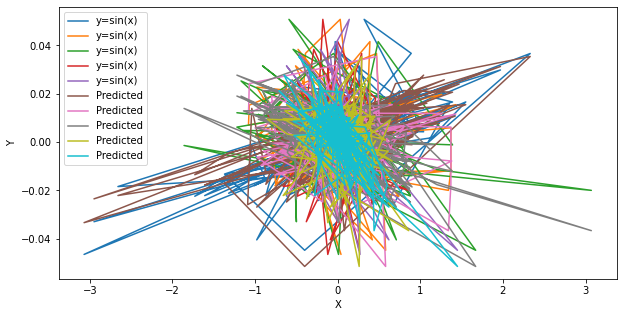

In [140]:
pred = grid_search.predict(X_test)
fig = plt.figure(figsize=(10,5))
plt.plot(X_test, y_test, label="y=sin(x)")
plt.plot(X_test, y_next_hat, label="Predicted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")

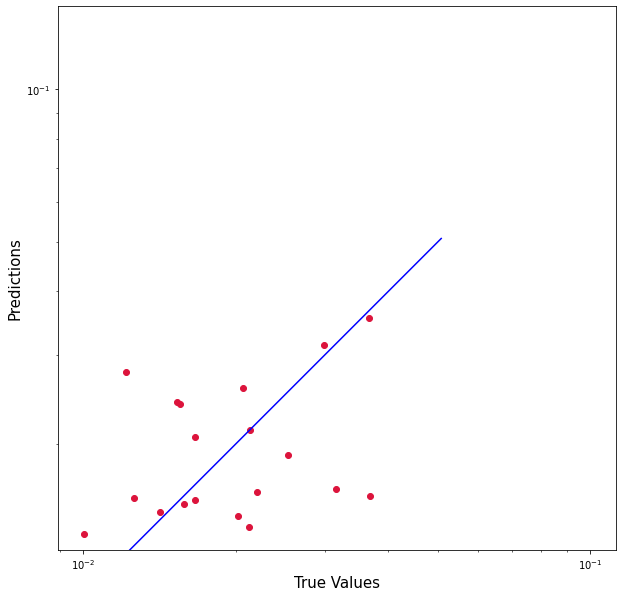

In [180]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Fama-French three-factor model

The Fama-French three-factor model could be viewed as a natural extension of
CAPM, which is actually a single factor model.

In [4]:
from scipy import stats
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime
plt.style.use('fivethirtyeight')
import operator


In [2]:
ff = pd.read_csv("fama-french.csv", skiprows=3, index_col = 0)

In [41]:
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from dateutil.relativedelta import relativedelta
ticker='ADBE'
start = datetime(2018,1,1)
end = datetime(2021,1,1)
df = DataReader(ticker,  'yahoo', start, end)

In [68]:
a, b = df["Adj Close"][1:].to_list(), df["Adj Close"][:-1]

In [69]:
logret = np.log(np.divide(a,b))

In [70]:
logret

Date
2018-01-02    0.018621
2018-01-03    0.011970
2018-01-04    0.011504
2018-01-05   -0.001620
2018-01-08    0.008931
                ...   
2020-12-23    0.005919
2020-12-24   -0.001822
2020-12-28    0.006313
2020-12-29   -0.009324
2020-12-30    0.005353
Name: Adj Close, Length: 755, dtype: float64

In [71]:
date=[]
d0=df.index

In [72]:
for i in range(0,len(logret)):
    date.append(''.join([d0[i].strftime("%Y"),d0[i].strftime("%m"),d0[i].strftime("%d")]))

In [73]:
# logret = np.diff(np.log(df['Adj Close']))

In [74]:
len(date)

755

In [86]:
t=pd.DataFrame(logret.to_list(),np.array(date,dtype="int64"),columns=['logret'])

In [88]:
t

,logret
20180102,0.018621
20180103,0.011970
20180104,0.011504
20180105,-0.001620
20180108,0.008931
...,...
20201223,0.005919
20201224,-0.001822
20201228,0.006313
20201229,-0.009324


In [89]:
ret= np.exp(t.groupby(t.index).sum())-1

In [90]:
t

,logret
20180102,0.018621
20180103,0.011970
20180104,0.011504
20180105,-0.001620
20180108,0.008931
...,...
20201223,0.005919
20201224,-0.001822
20201228,0.006313
20201229,-0.009324


In [91]:
final=pd.merge(ret,ff,left_index=True,right_index=True)

In [93]:
y=final.logret
x=final[['Mkt-RF','SMB','HML']]
x=sm.add_constant(x)
results=sm.OLS(y,x).fit()
print(results.params)

const     0.001854
Mkt-RF   -0.004795
SMB       0.003353
HML      -0.001464
dtype: float64


# note to rajavi : Print the ols statistics as well, p values t statistics and all

## Fama-MacBeth regression